In [1]:
from IPython.display import Image
import pygraphviz as pgv

In [2]:
def get_graph():
    g = pgv.AGraph(size='16,9', ratio='fill', resolution='300', rankdir='LR', 
              directed='true')

    g.node_attr['width'] = '1.0'  
    g.node_attr['fontsize'] = '35'  
    g.edge_attr['penwidth'] = '1'
    g.node_attr['style']='filled'
    g.node_attr['fillcolor']='black'
    return g

def wrapping_up(g, fname):
    g.draw(fname, prog="dot")
    return Image(fname)

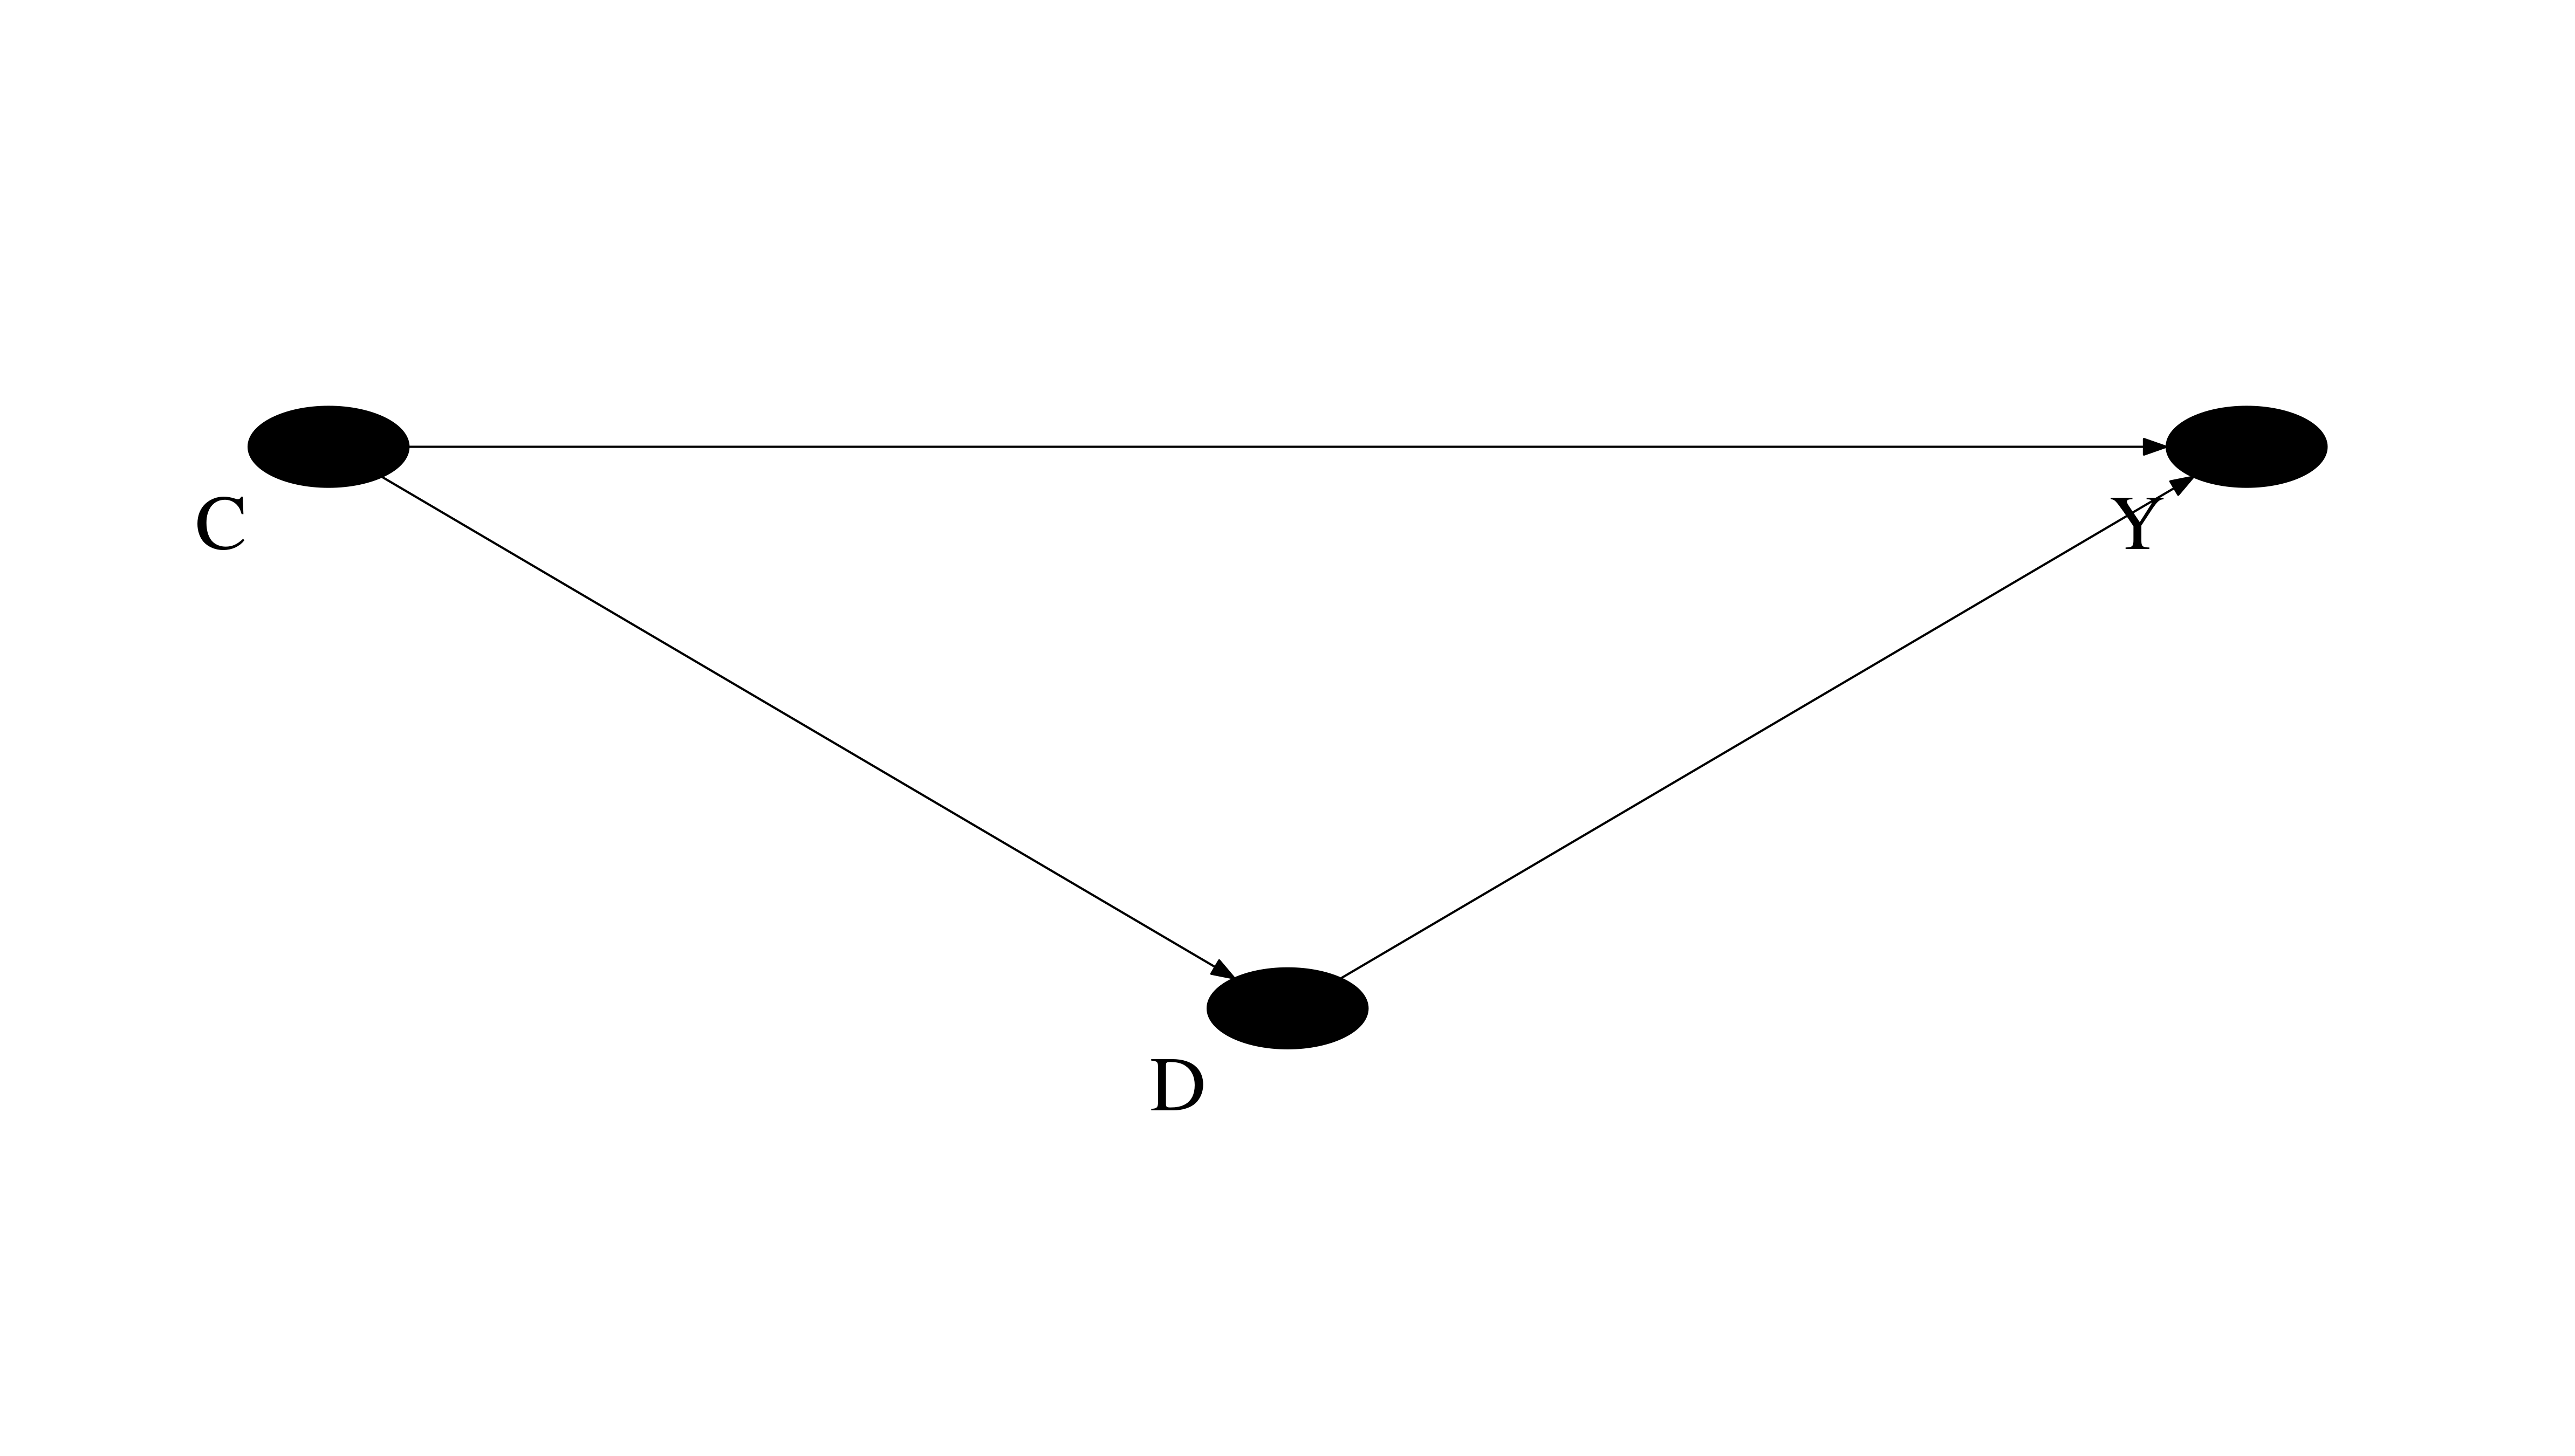

In [3]:
# This graphs is a simple illustration of a confounding variable.
g = get_graph()

g.add_node('C', label='', xlabel='C')
g.add_node('Y', label='', xlabel='Y')
g.add_node('D', label='', xlabel='D')


g.add_edge('D', 'Y')
g.add_edge('C', 'Y')
g.add_edge('C', 'D')

wrapping_up(g, 'fig-observed-confounding-variable.png' )

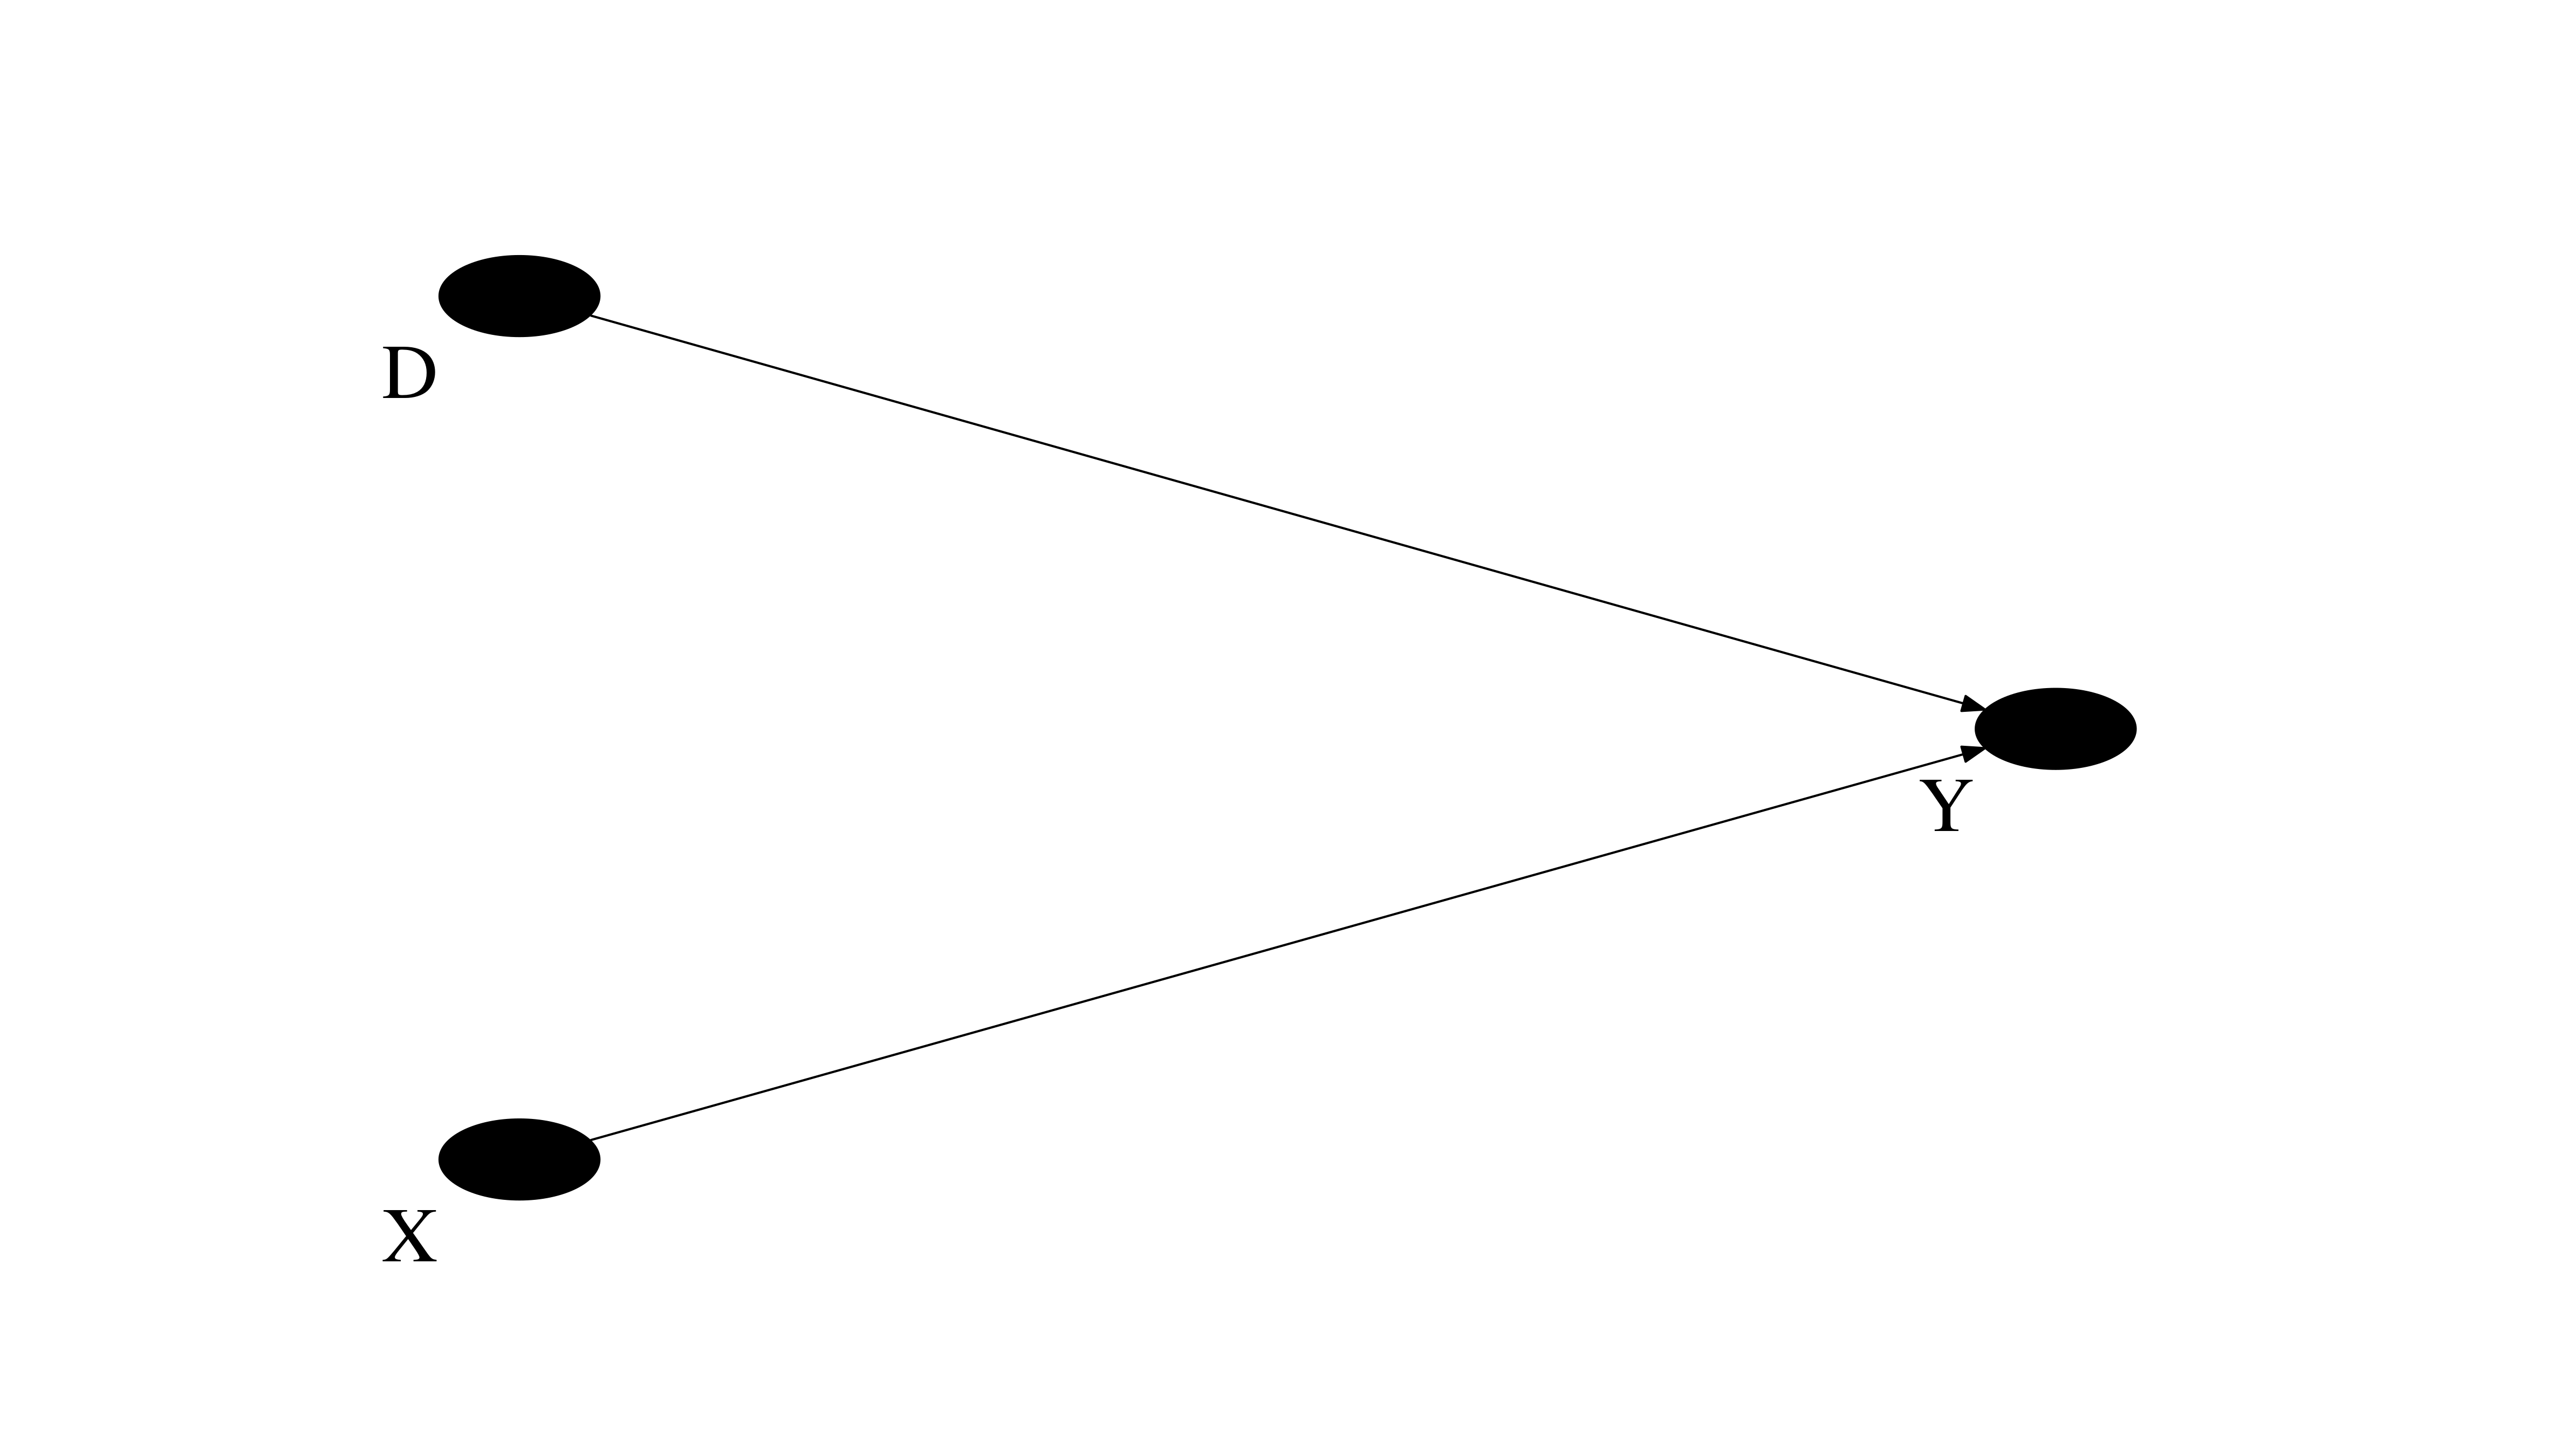

In [4]:
# This graphs illustrates the implicit setup behind the mean comparison 
# of the Lalonde dataset.
g = get_graph()

g.add_node('D', label='', xlabel='D')
g.add_node('Y', label='', xlabel='Y')
g.add_node('X', label='', xlabel='X')

g.add_edge('D', 'Y')
g.add_edge('X', 'Y')

wrapping_up(g, 'fig-implicit-lalonde.png' )

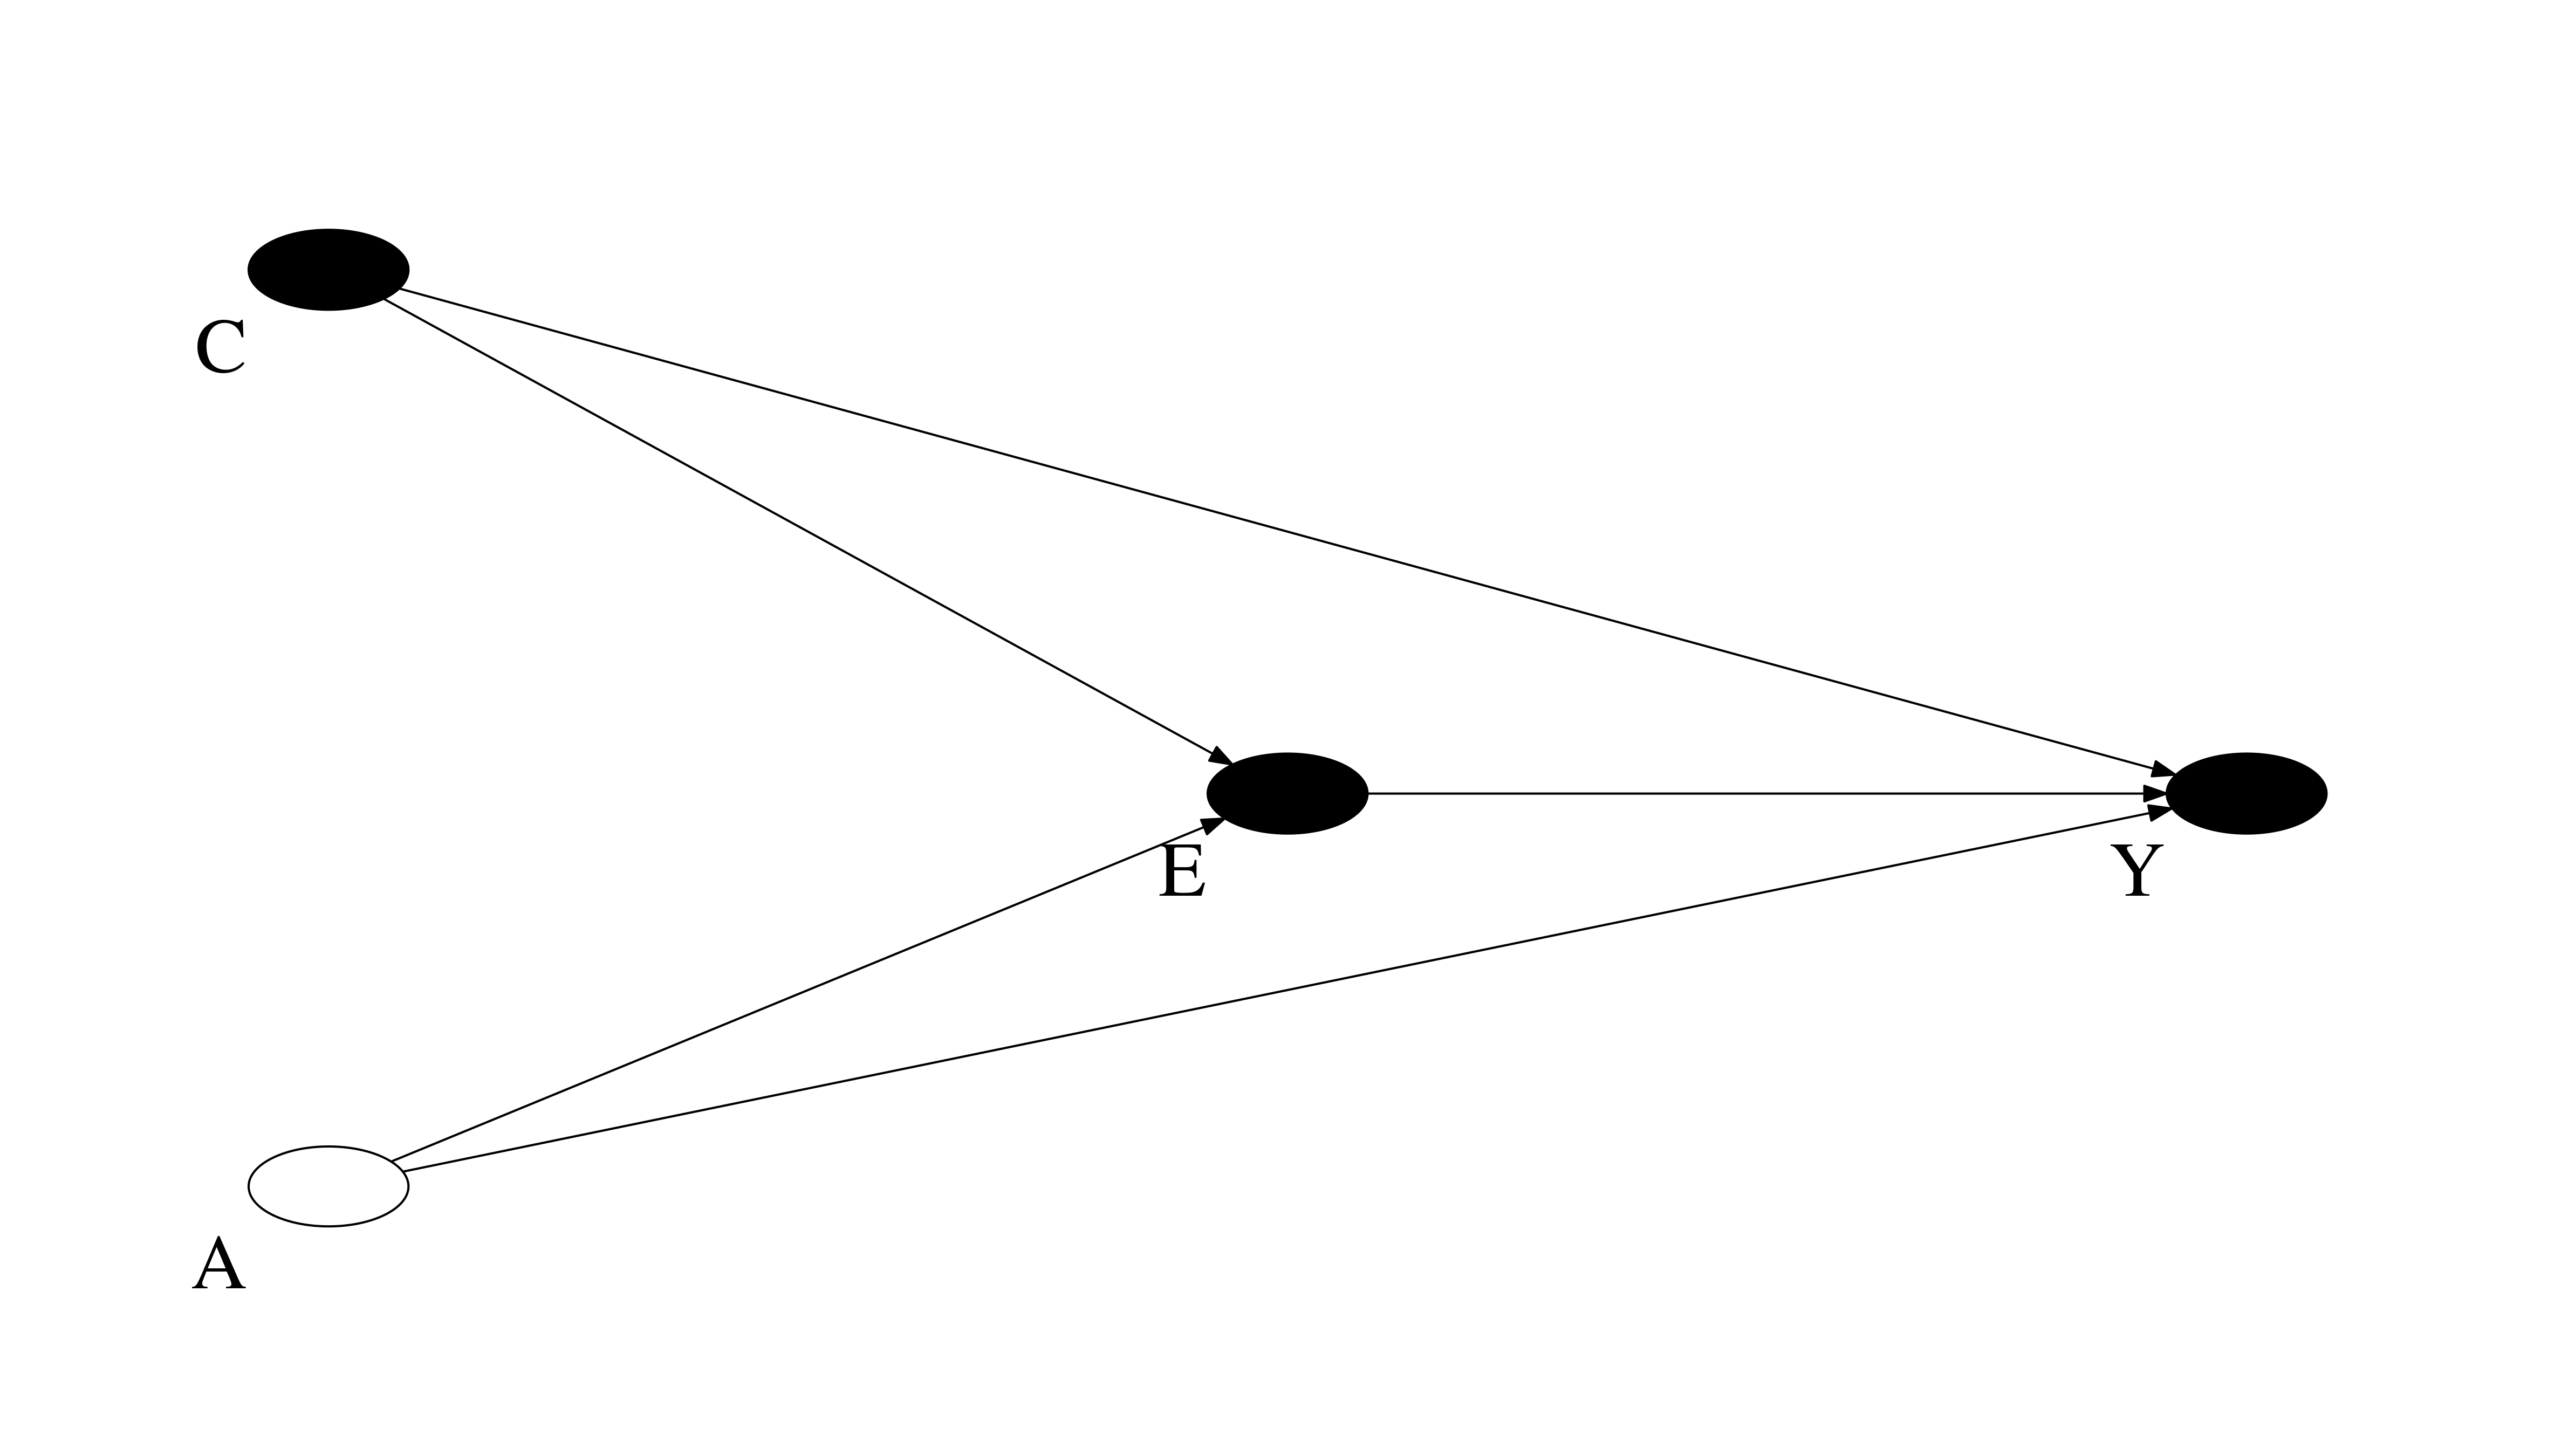

In [5]:
# This graphs shows the role of observed and unobserved confounders 
# in the economics of education.
g = get_graph()

g.add_node('C', label='', xlabel='C')
g.add_node('E', label='', xlabel='E')
g.add_node('A', label='', xlabel='A', fillcolor='white')
g.add_node('Y', label='', xlabel='Y')

g.add_edge('C', 'E')
g.add_edge('C', 'Y')
g.add_edge('A', 'E')
g.add_edge('A', 'Y')
g.add_edge('E', 'Y')

wrapping_up(g, 'fig-confounders-education.png' )

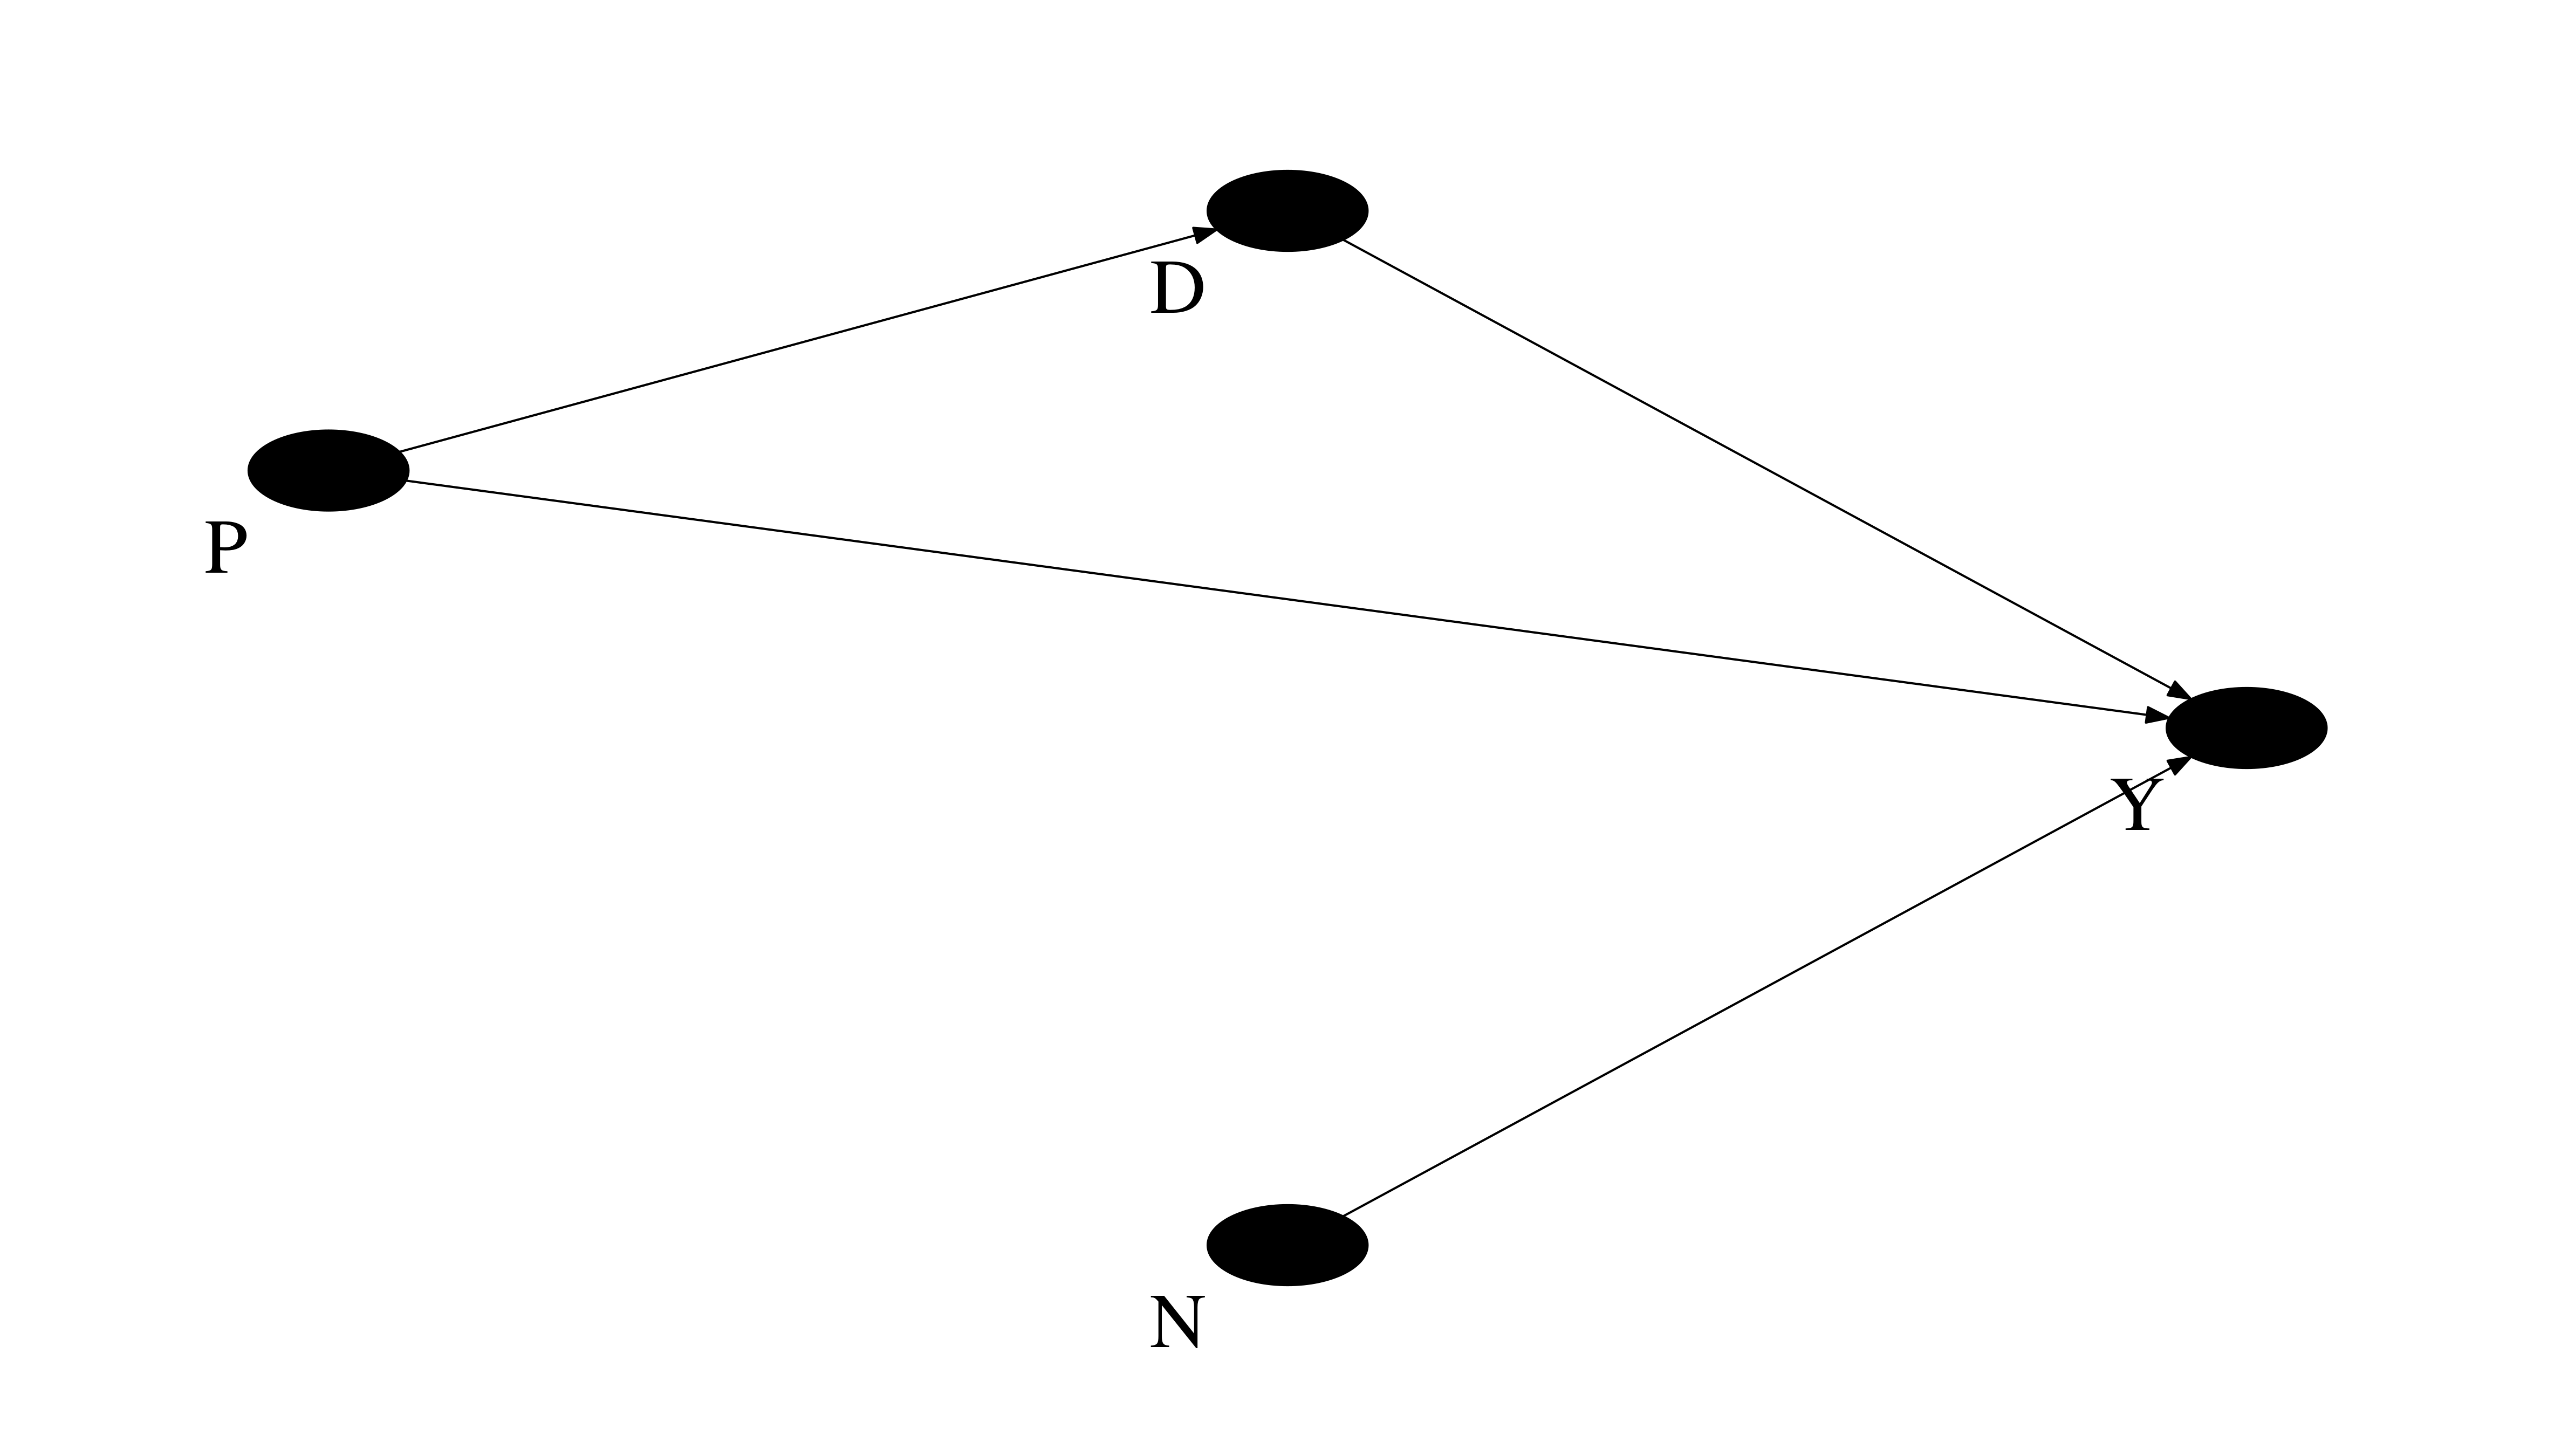

In [6]:
g = get_graph()


g.add_node('P', label='', xlabel='P')
g.add_node('D', label='', xlabel='D')
g.add_node('Y', label='', xlabel='Y')
g.add_node('N', label='', xlabel='N')


g.add_edge('P', 'D')
g.add_edge('P', 'Y')
g.add_edge('D', 'Y')
g.add_edge('N', 'Y')

wrapping_up(g, 'fig-equivalent-representations-standard.png' )

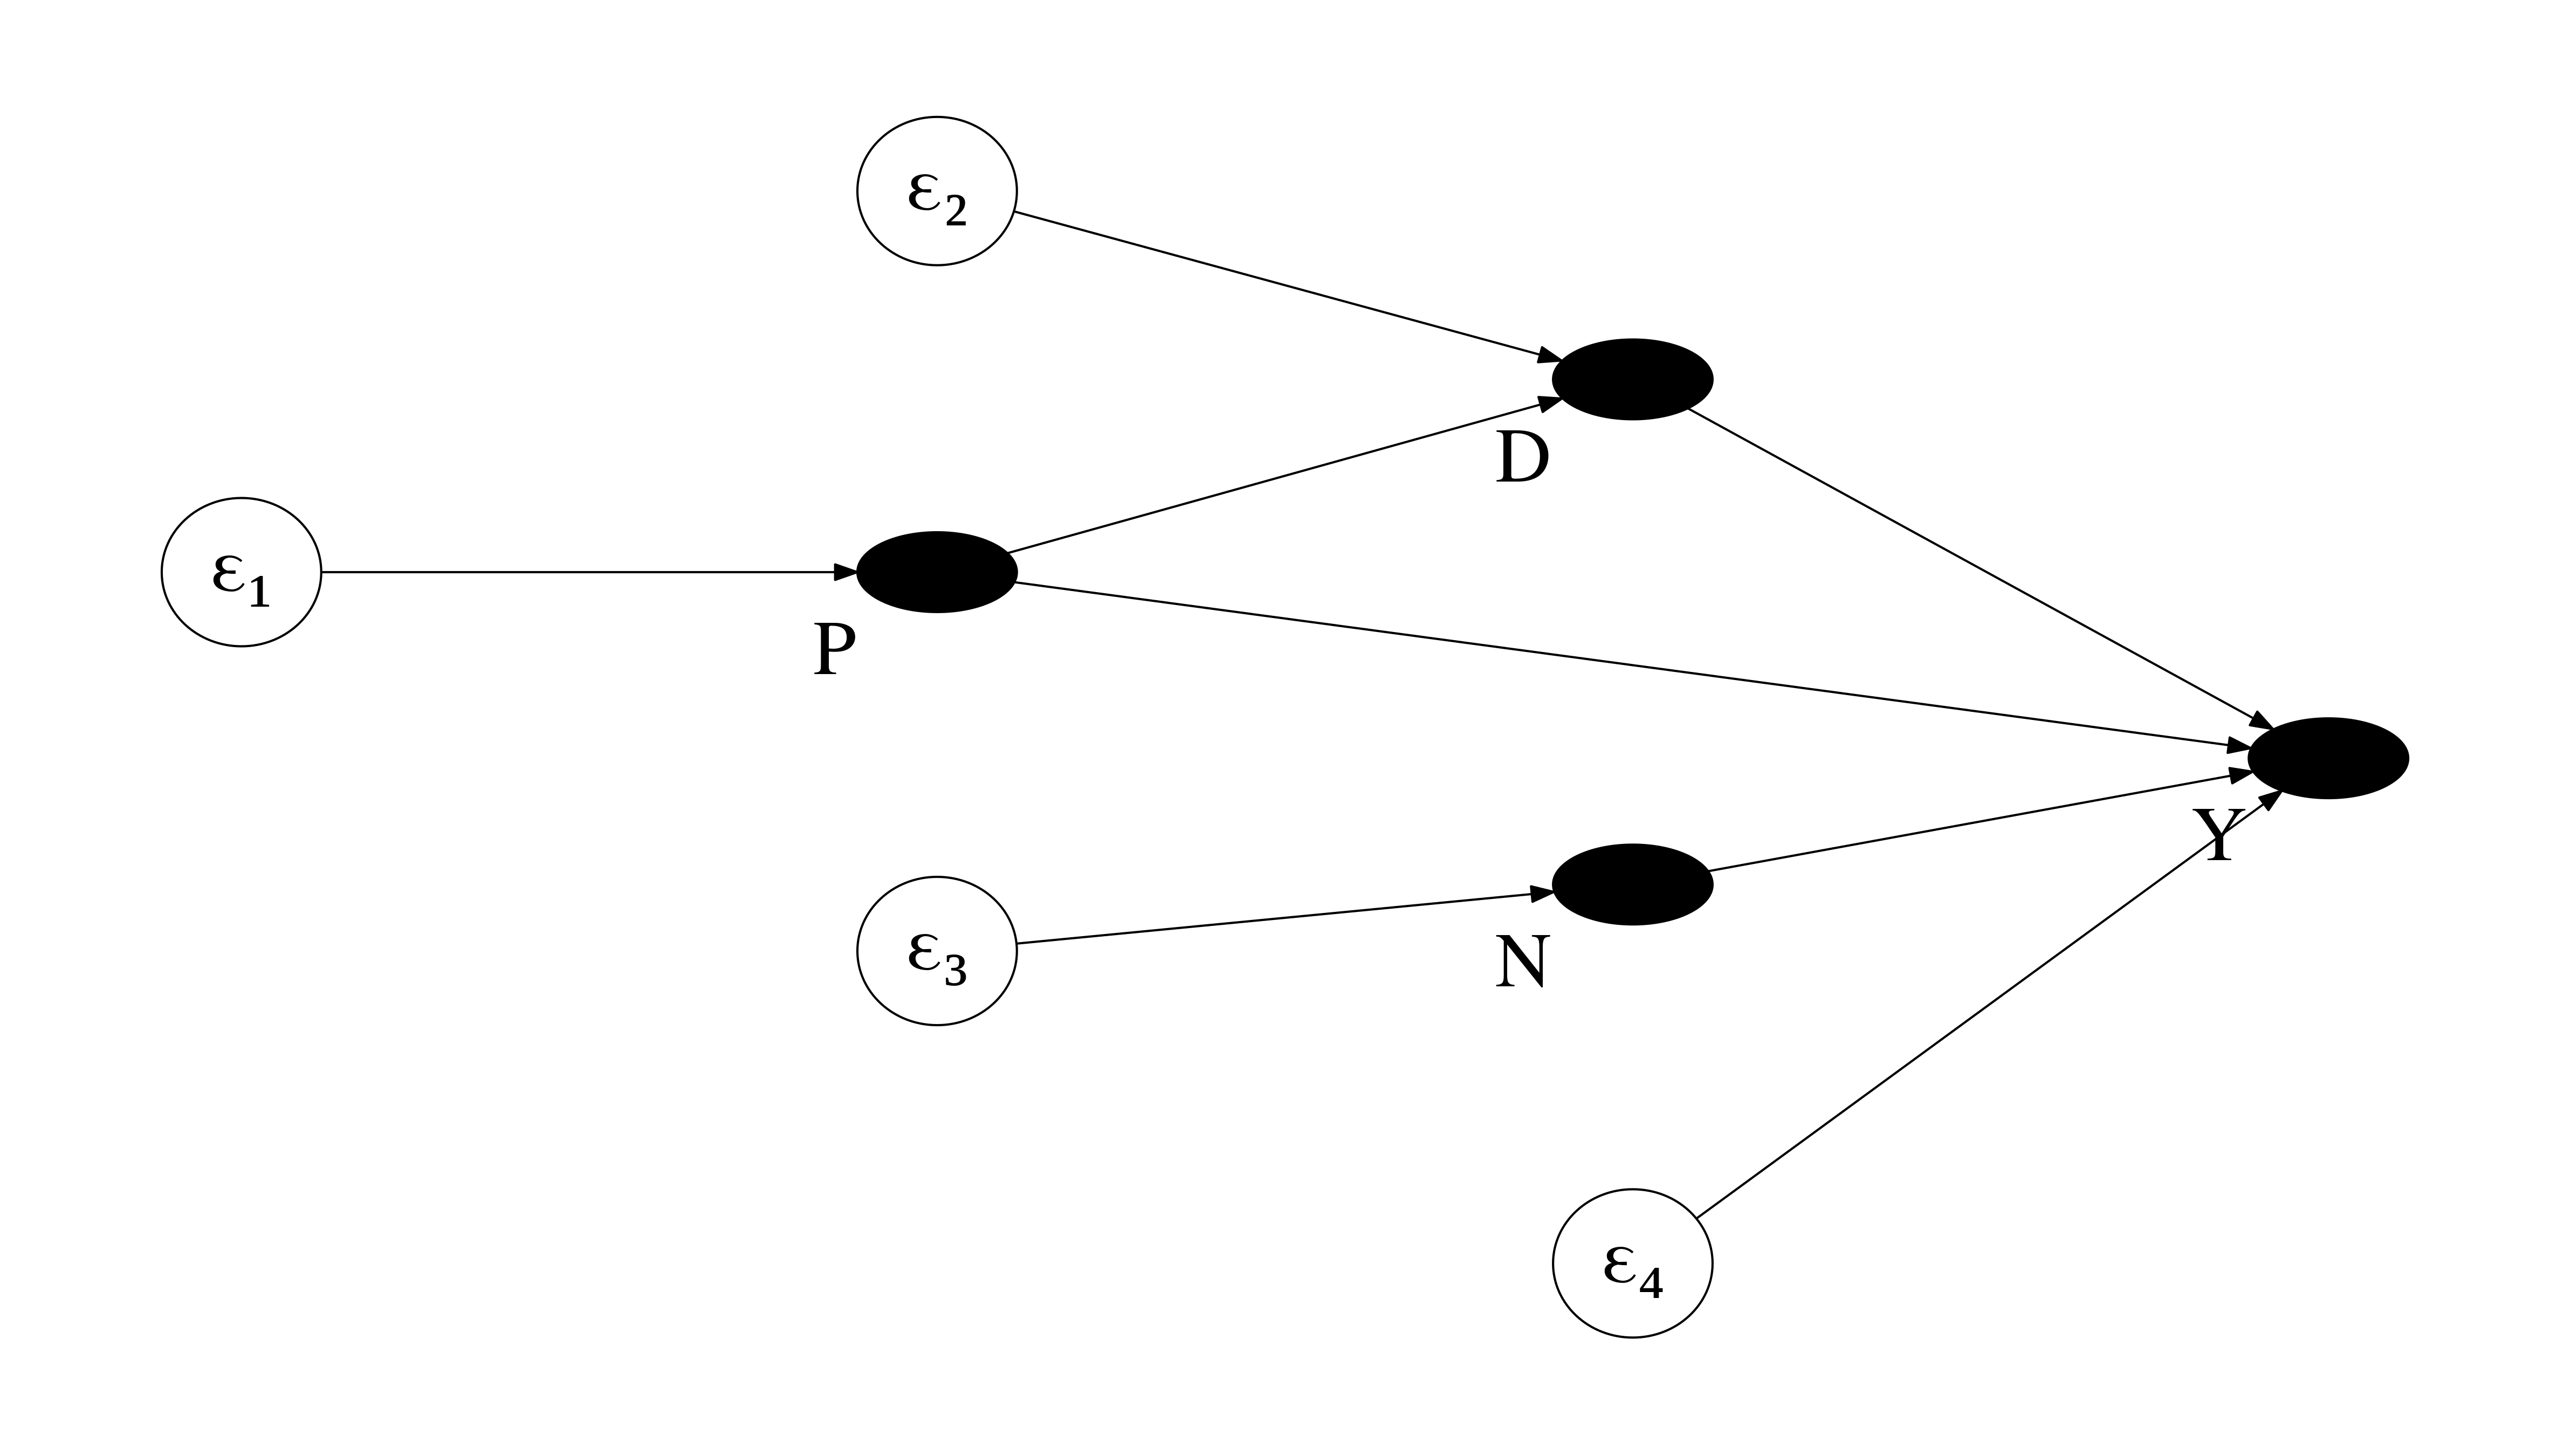

In [7]:
g = get_graph()

g.add_node('E_1', label='&#949;&#x2081;', fillcolor='white')
g.add_node('P', label='', xlabel='P')

g.add_node('E_2', label='&#949;&#x2082;', fillcolor='white')
g.add_node('D', label='', xlabel='D')

g.add_node('E_3', label='&#949;&#x2083;', fillcolor='white')
g.add_node('Y', label='', xlabel='Y')

g.add_node('E_4', label='&#949;&#x2084;', fillcolor='white')
g.add_node('N', label='', xlabel='N')


g.add_edge('E_1', 'P')
g.add_edge('E_2', 'D')
g.add_edge('E_4', 'Y')
g.add_edge('E_3', 'N')


g.add_edge('P', 'D')
g.add_edge('P', 'Y')
g.add_edge('D', 'Y')
g.add_edge('N', 'Y')

wrapping_up(g, 'fig-equivalent-representations-magnified.png' )

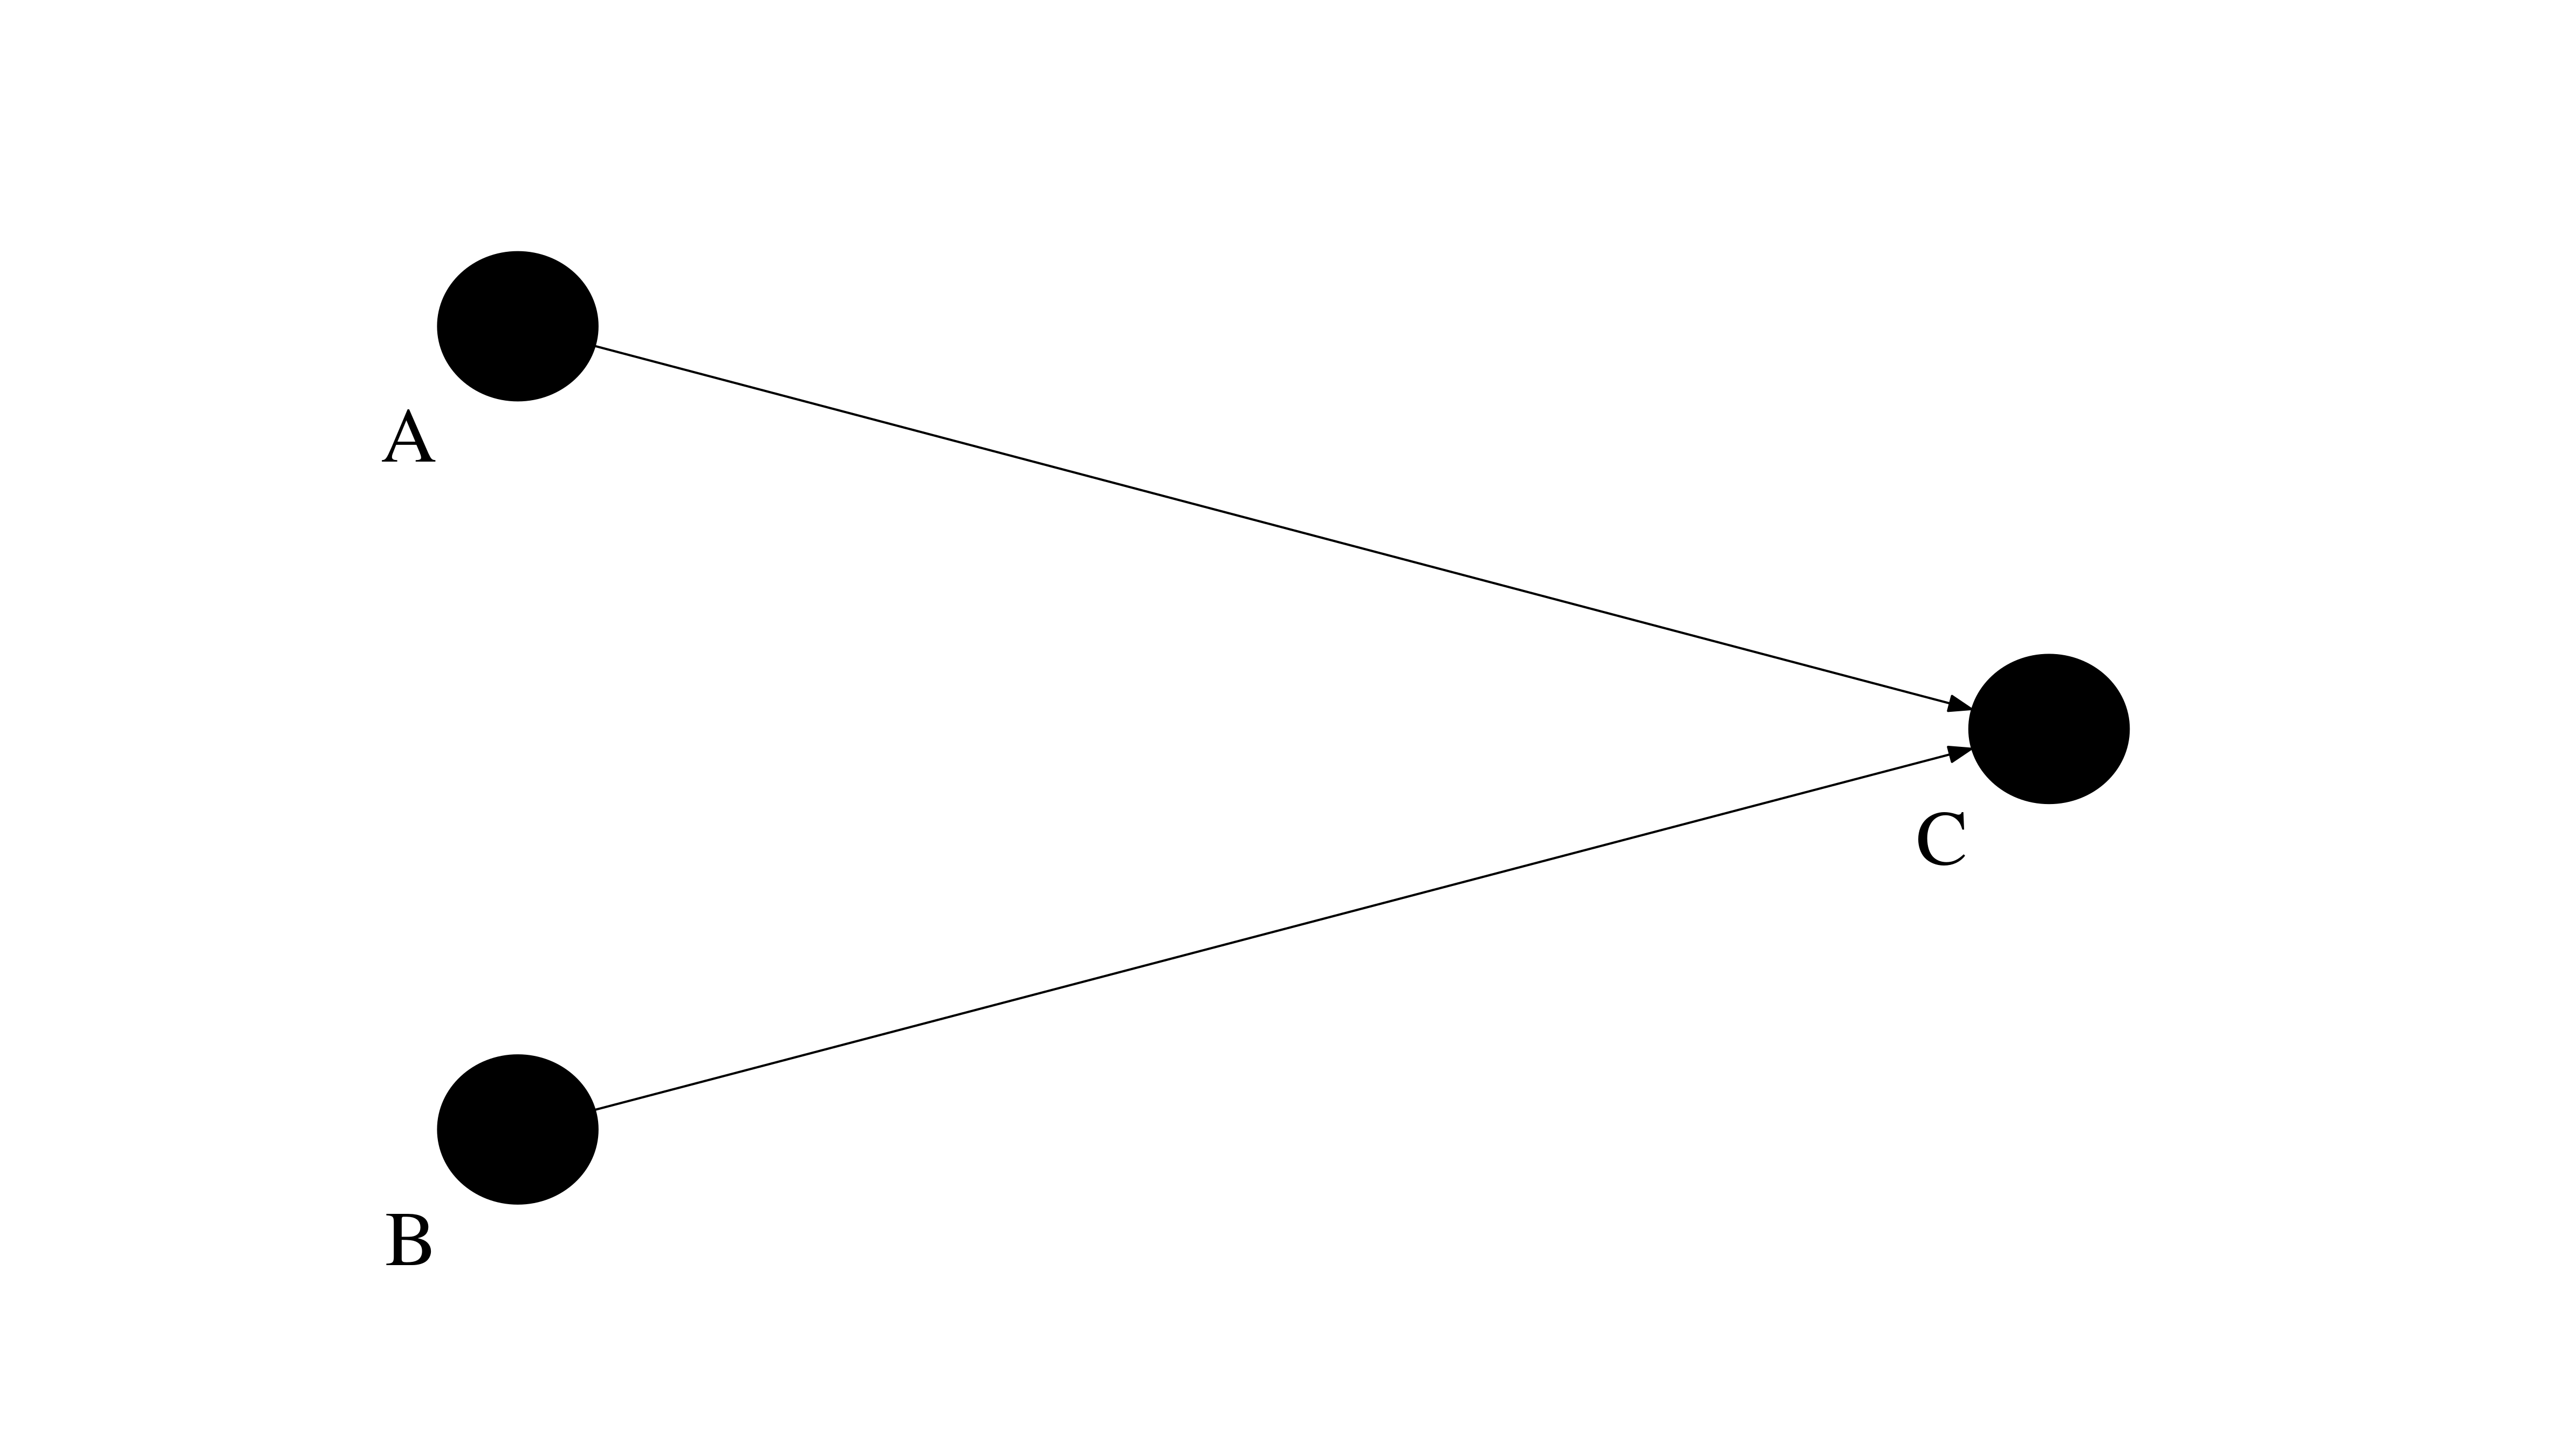

In [8]:
g = get_graph()

g.add_node('A', xlabel='A')
g.add_node('B', xlabel='B')
g.add_node('C', xlabel='C')

g.add_edge('A', 'C')
g.add_edge('B', 'C')

wrapping_up(g, 'fig-collider-variable.png' )

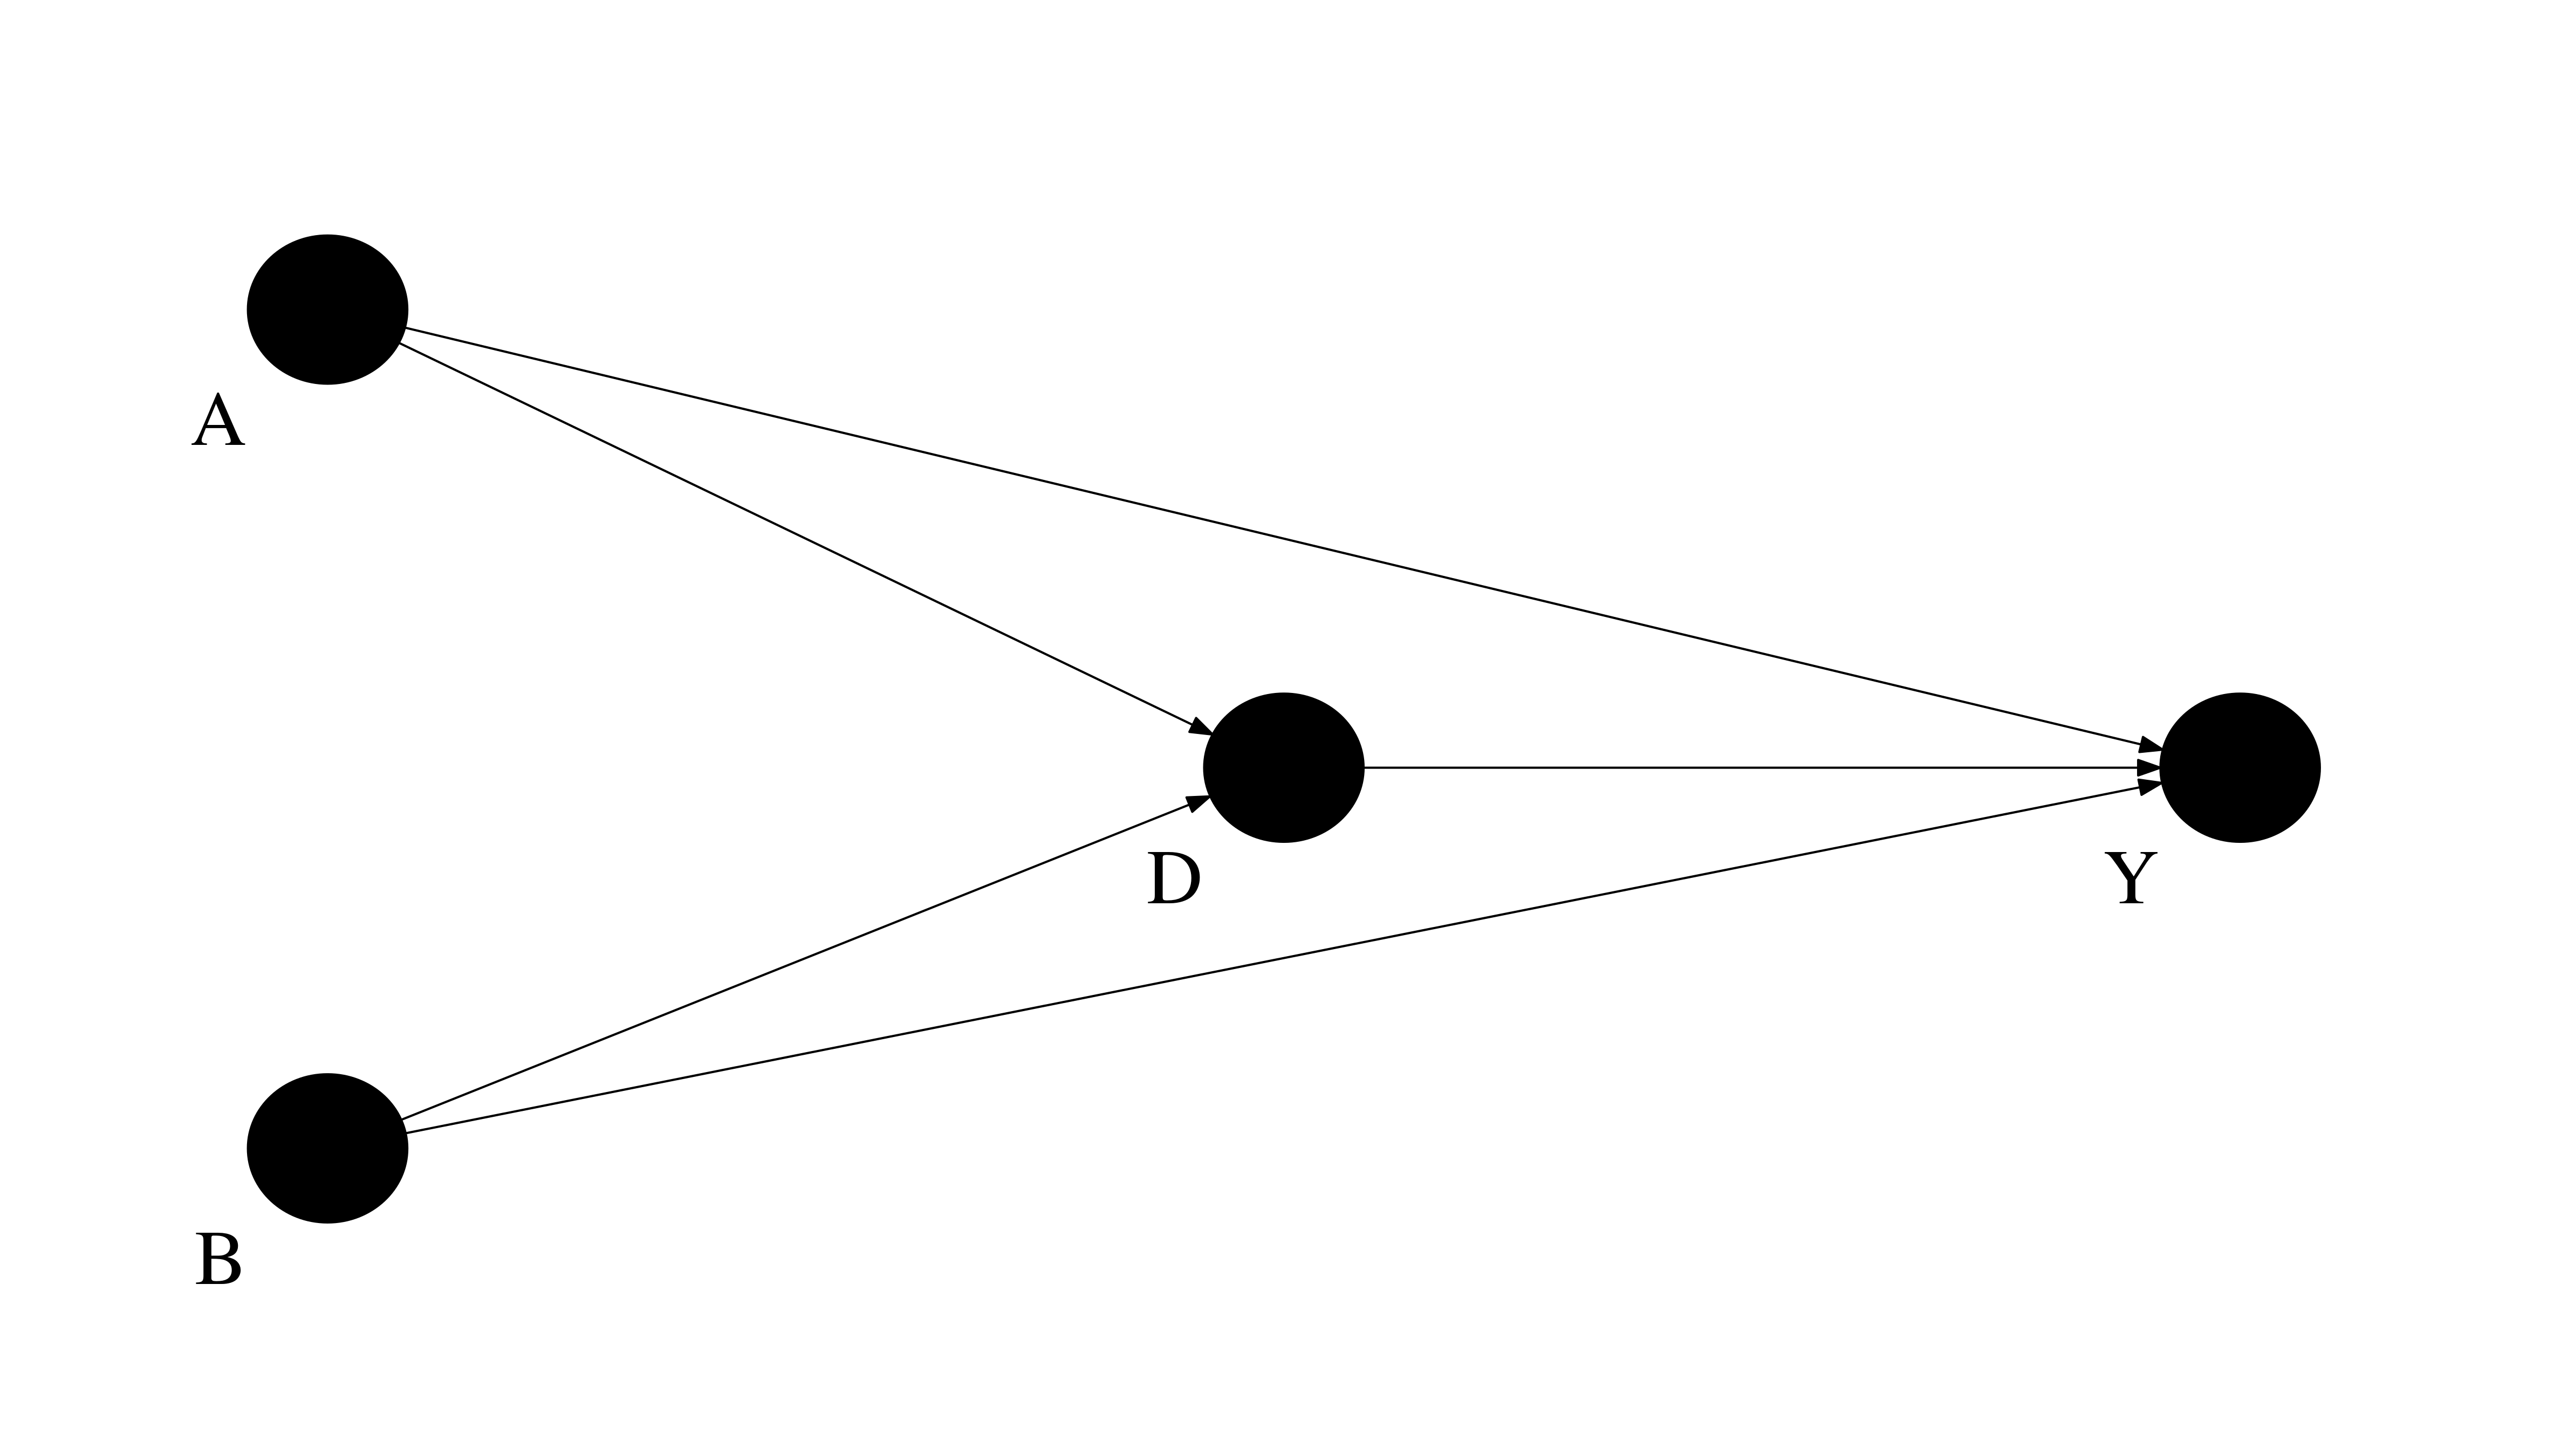

In [9]:
g = get_graph()

g.add_node('D', xlabel='D')
g.add_node('Y', xlabel='Y')
g.add_node('A', xlabel='A')
g.add_node('B', xlabel='B')


g.add_edge('A', 'D')
g.add_edge('B', 'D')
g.add_edge('D', 'Y')
g.add_edge('A', 'Y')
g.add_edge('B', 'Y')

wrapping_up(g, 'fig-matching-demonstration-3.png' )

# Lecture 8 + 9: Instrumental variables / Mechanisms

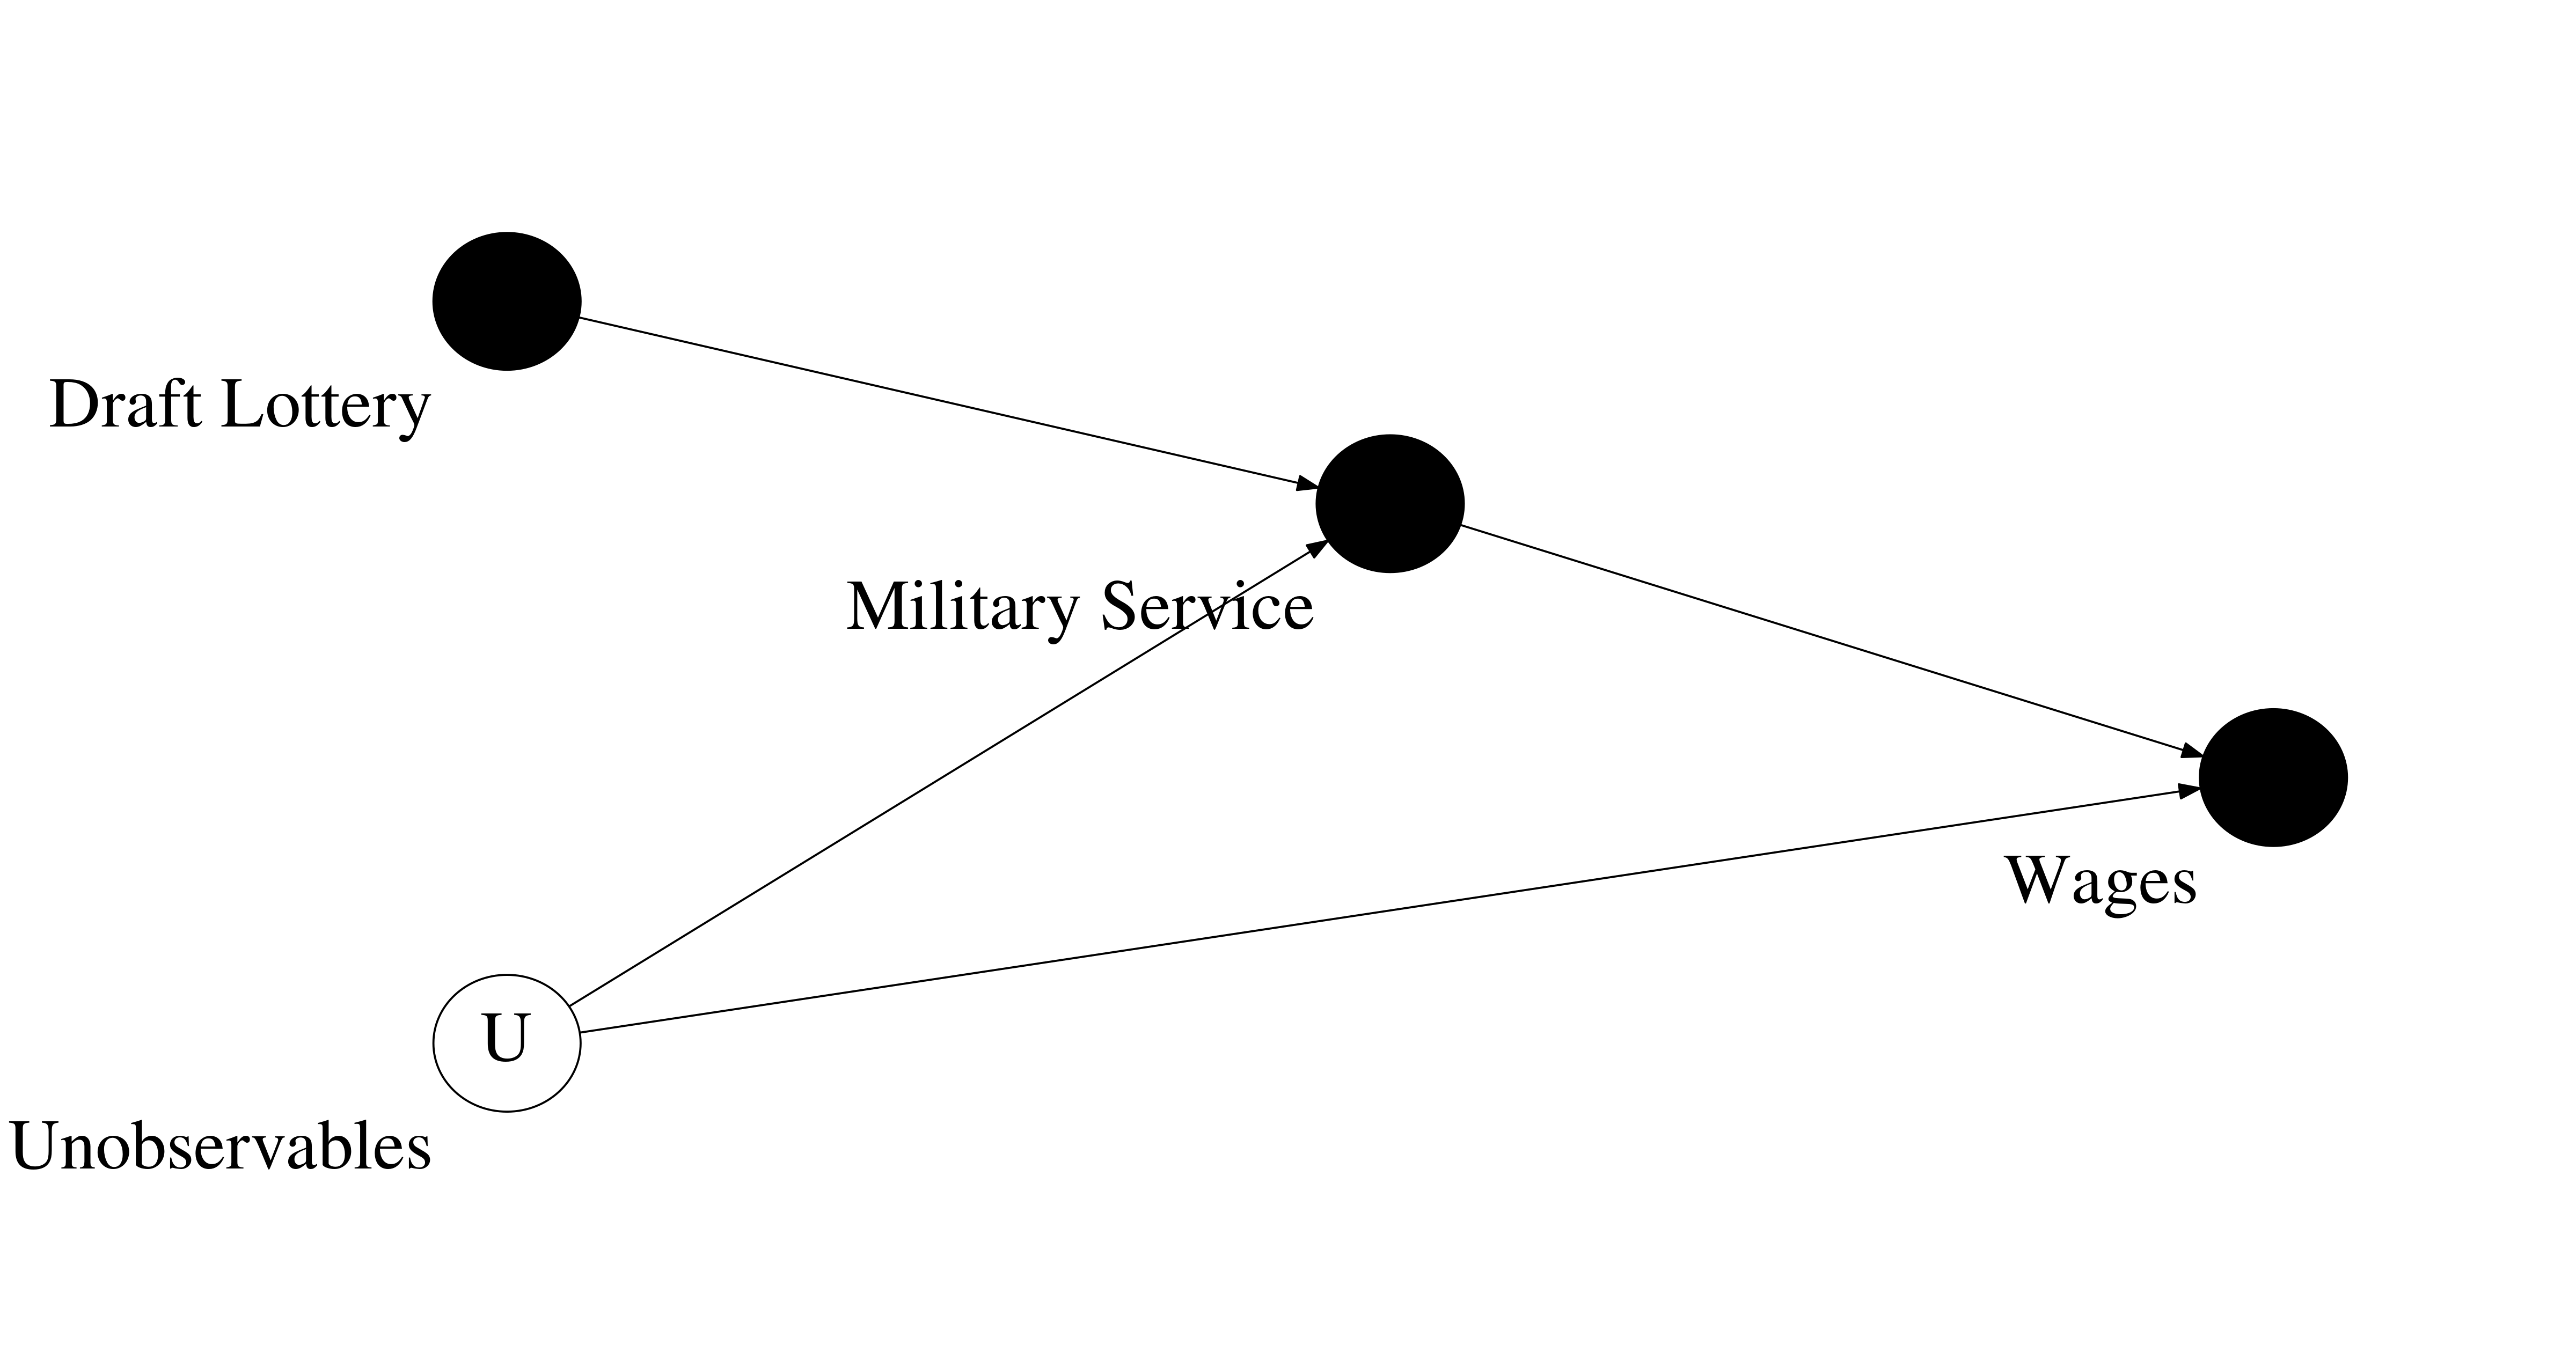

In [10]:
g = get_graph()

g.add_node('D', xlabel='Military Service')
g.add_node('Y', xlabel='Wages')
g.add_node('Z', xlabel='Draft Lottery')
g.add_node('U', xlabel='Unobservables', fillcolor='white')


g.add_edge('Z', 'D')
g.add_edge('D', 'Y')
g.add_edge('U', 'D')
g.add_edge('U', 'Y')

wrapping_up(g, 'fig-angrist-1990-valid.png' )

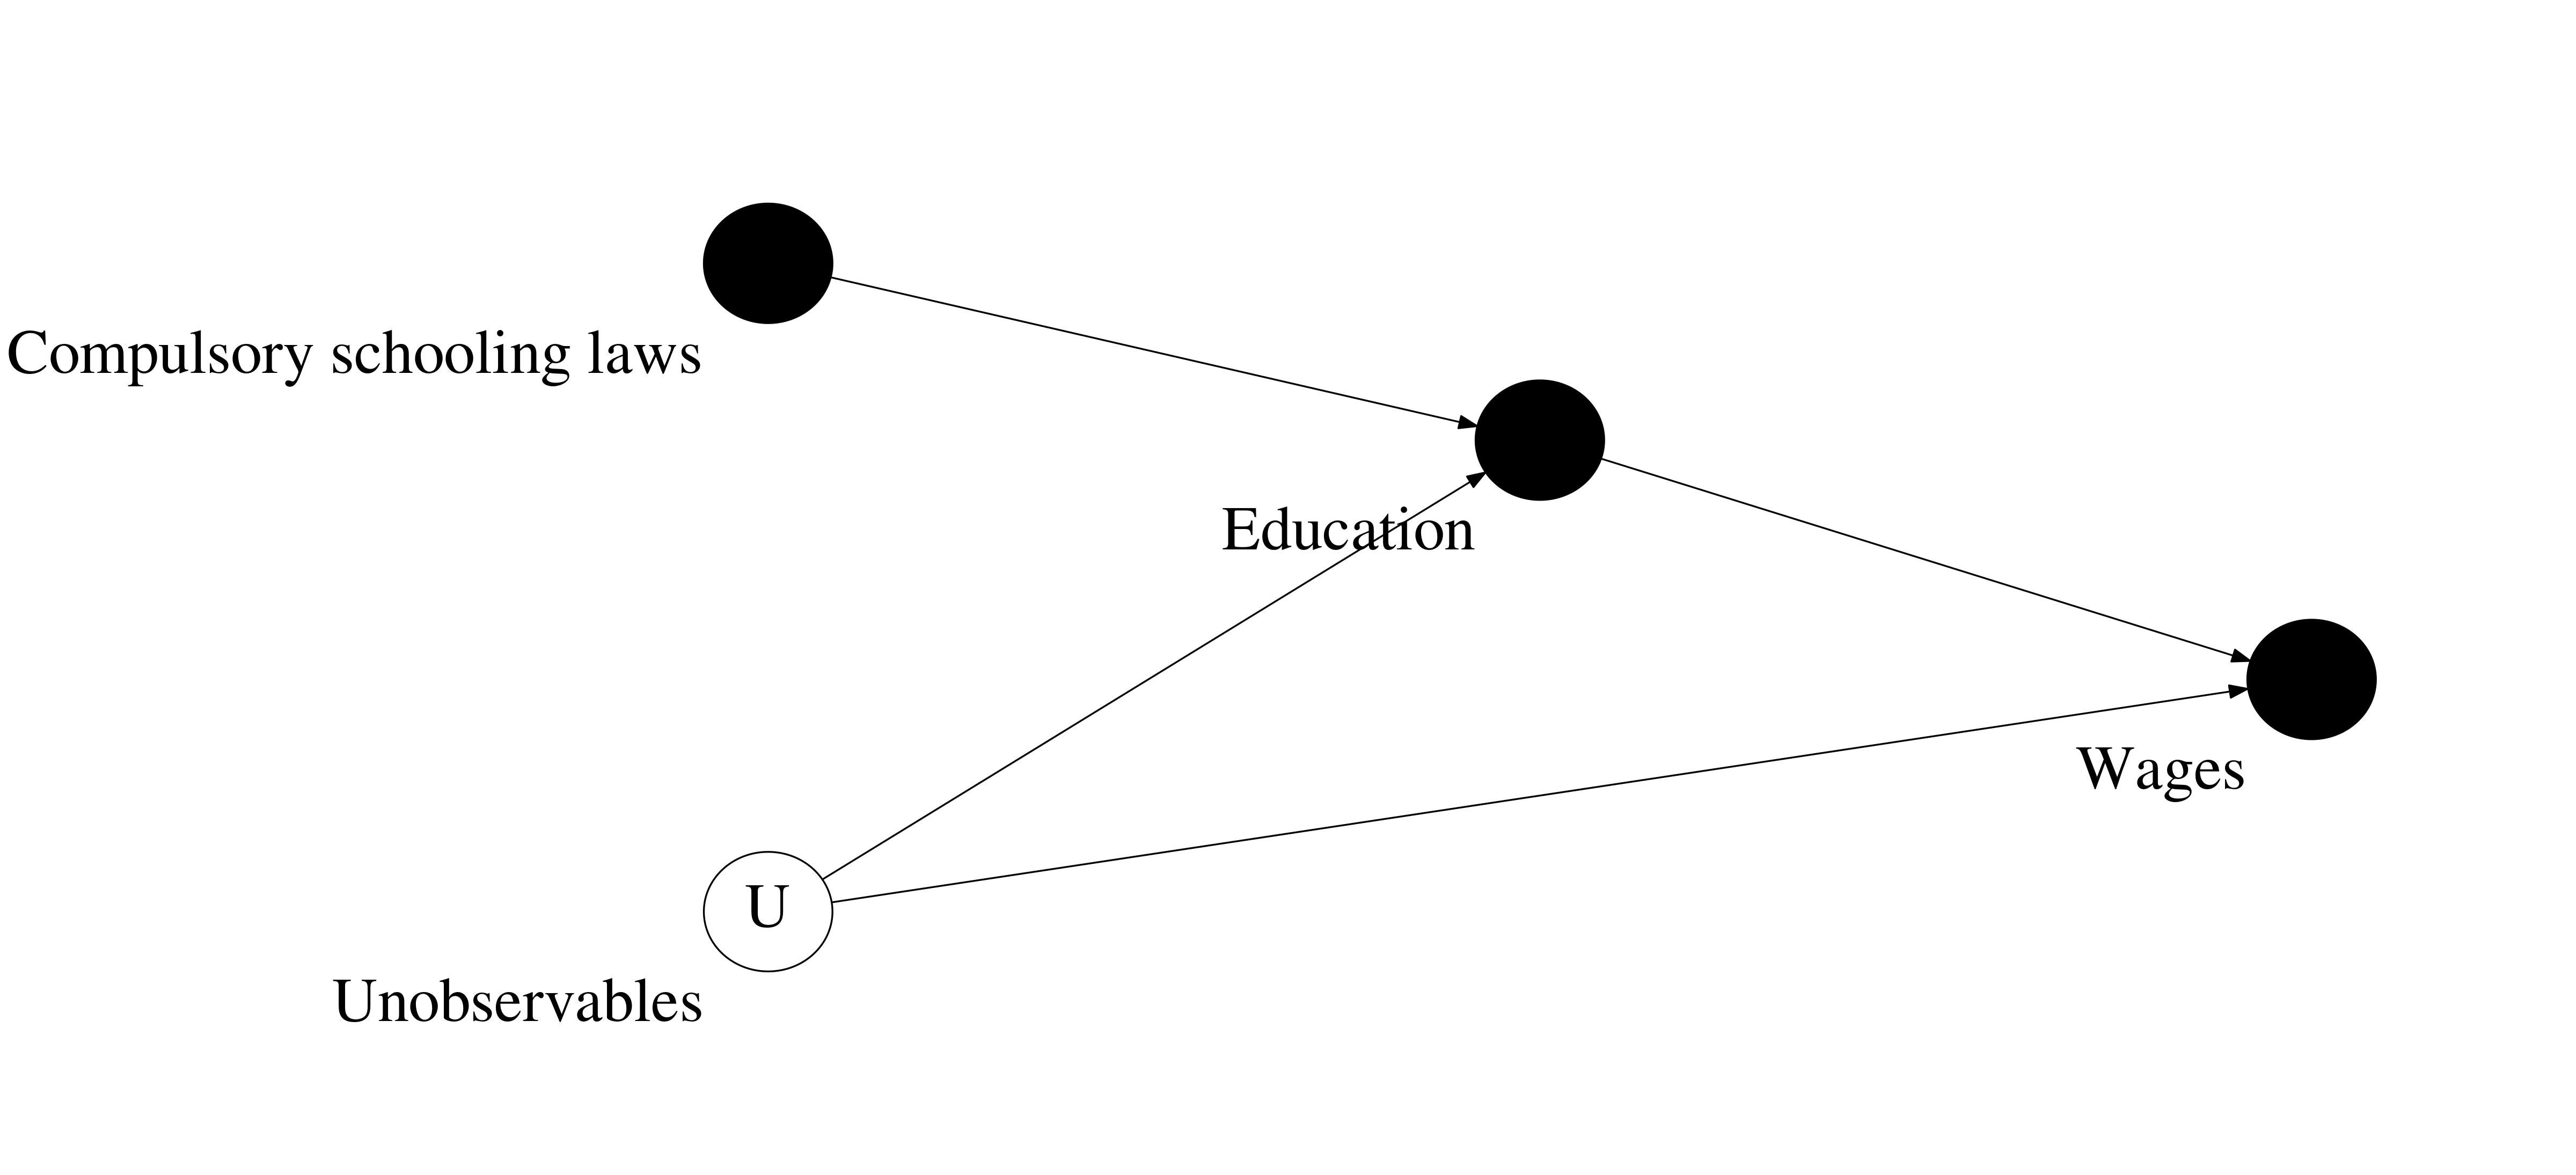

In [16]:
g = get_graph()

g.add_node('D', xlabel='Education')
g.add_node('Y', xlabel='Wages')
g.add_node('Z', xlabel='Compulsory schooling laws')
g.add_node('U', xlabel='Unobservables', fillcolor='white')


g.add_edge('U', 'D')
g.add_edge('U', 'Y')
g.add_edge('Z', 'D')
g.add_edge('D', 'Y')

wrapping_up(g, 'fig-angrist-krueger-1991-valid.png' )

## Lecture 13: Generalized method of moments

In [3]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, num=110, endpoint=True)
y = np.cos(-x**2/9.0)

f = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=200, endpoint=True)

fig, ax = plt.subplots(1, 1)
ax.plot(xnew, f(xnew))
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$E[g_i(\beta)]$')
plt.savefig('figure-1.png')
